# Quanto mais complexo um modelo de ML mais assertivo ele fica?
## Nesta primeira célula vamos realizar os imports
<p>Utilizaremos as seguintes bibliotecas para as seguintes funções: 
 <ul>
 <li> Pandas: para interpretação de arquivos/dados;</li>
 <li> Matplotlib: para construção de gráficos;</li>
 <li> Sklearn: afim de importar modelos de ML;</li>
     <li> Warnings: para ignorar alguns avisos que o jupyter passa. </li>
 </ul>
</p>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model,preprocessing
import warnings
import numpy as np
warnings.filterwarnings("ignore")

## Já a segunda célula é responsável pela leitura e seleção das características desejadas para o modelo.

In [10]:
treino = pd.read_csv('./dS/train.csv')
teste = pd.read_csv('./dS/test.csv')
data_treino = treino.drop(['Name','Ticket','Cabin','PassengerId',],axis=True)
data_test = teste.drop(['Name','Ticket','Cabin','PassengerId',],axis=True)
data_treino.drop('Survived',axis=1).head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S


## Próximo passo foi quebrar as características em diversas colunas e preencher espaços vazios (para a máquina entender melhor)

In [11]:
data_treino = pd .get_dummies(data_treino)
data_test = pd .get_dummies(data_test)
data_treino['Age'].fillna(data_treino['Age'].mean(),inplace=True)
data_treino['Fare'].fillna(data_treino['Fare'].mean(),inplace=True)
data_treino.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1


## Separando os dados em duas partes iguais para poder validar treino e predição

In [12]:
np.random.seed(0)
x_treino,x_valid=train_test_split(data_treino,test_size=0.5)
x_treino1 = x_treino.drop('Survived',axis=True)
x_valid1 = x_valid.drop('Survived',axis=True)

## Criando o modelo de arvore de decisão com 5 nós

In [13]:
arvore= DecisionTreeClassifier(max_depth=5,random_state=0)
arvore.fit(x_treino1,x_treino['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

## Realizando um teste score  simples

In [14]:
a = arvore.predict(x_valid1)
resultados = pd.DataFrame()
resultados['Previsto'] = a
np.mean(x_valid['Survived']==a)

0.8026905829596412

## Será que mais nós fazer sua assertividade melhor?

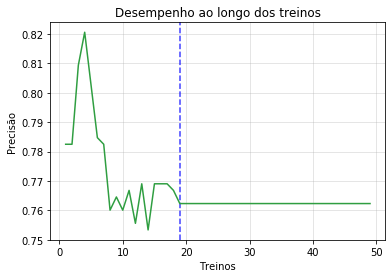

In [15]:
performace = []
ntreino = []
for x in range(1,50):
    arvore= DecisionTreeClassifier(max_depth=x,random_state=0)
    arvore.fit(x_treino1,x_treino['Survived'])
    a = arvore.predict(x_valid1)
    resultados = pd.DataFrame()
    resultados['Previsto'] = a
    j = np.mean(x_valid['Survived']==a)
    performace.append(j)
    ntreino.append(x)
plt.title('Desempenho ao longo dos treinos')
plt.xlabel('Treinos')
plt.ylabel('Precisão')
plt.grid(alpha=0.4)
plt.axvline(19, color='Blue', alpha=0.75,linestyle='--',label='Overfitting')
plt.plot(ntreino,performace, color='#2f9e41')
plt.savefig('ArvoreD.png')

## O mesmo comportamento se repete no modelo Floresta randômica ?

In [ ]:
rperformace = []
rntreino = []
for x in range(1,50):
    rArvore = RandomForestClassifier(n_estimators=x,n_jobs=-1,random_state=0)
    rArvore.fit(x_treino1,x_treino['Survived'])
    a = rArvore.predict(x_valid1)
    resultados = pd.DataFrame()
    resultados['Previsto'] = a
    j = np.mean(x_valid['Survived']==a)
    rperformace.append(j)
    rntreino.append(x)
plt.title('Desempenho ao longo dos treinos')
plt.xlabel('Treinos')
plt.ylabel('Precisão')
plt.grid(alpha=0.4)
plt.plot(rntreino,rperformace, color='#2f9e41')
plt.savefig('FlorestaR.png')

## E para o modelo de regressão linear ?

In [ ]:
lperformace = []
lntreino = []
for x in range(1,20):
    linha = linear_model.LogisticRegression()
    linha.fit(x_treino1,x_treino['Survived'])
    a = linha.predict(x_valid1)
    resultados = pd.DataFrame()
    resultados['Previsto'] = a
    j = np.mean(x_valid['Survived']==a)
    lperformace.append(j)
    lntreino.append(x)
plt.title('Desempenho ao longo dos treinos')
plt.xlabel('Treinos')
plt.ylabel('Precisão')
plt.grid(alpha=0.4)
plt.plot(lntreino,lperformace, color='#2f9e41')
plt.savefig('RegressãoL.png')